In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 19:30:17 2020

@author: pranaydogra
"""
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [ ]:
read_dir = "Enter directory where files are stored"
save_dir = "Enter directory where you want to save the output files "
os.chdir(dir)
print(os.getcwd())

In [13]:
#%%
# STEP 1:
# Read all files and create a master dataframe with all the text
all_files = glob.glob(f'*.json', recursive=True)

class Readingfiles:
    def __init__(self, file_path):
        with open(file_path) as file:
            data = json.load(file)
            # Paper ID
            self.paper_id = data['paper_id']
            # Title
            self.title = data["metadata"]["title"]
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in data['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in data['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
            
# creata a dataframe that has text and other details from all the papers
dict_ = {'paper_id': [], 'title': [], 'abstract': [], 'body_text': []}
for idx, paper in enumerate(all_files):
    content = Readingfiles(paper)
    dict_['paper_id'].append(content.paper_id)
    dict_['title'].append(content.title)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
all_info = pd.DataFrame(dict_, columns=['paper_id', 'title', 'abstract', 'body_text'])
all_info.head()

,paper_id,title,abstract,body_text
0,8cff063c436820e2c85479244dcf7b5f123d4446,A Novel Approach to Clustering Genome Sequence...,Classification of DNA sequences is an importan...,With the rapid development of Next Generation ...
1,d1d1a8d96a13afa9c54ff26241095b55c0be7ff1,Chikungunya triggers an autophagic process whi...,Background: Chikungunya Virus (ChikV) surprise...,Chikungunya Virus (ChikV) is an Alphavirus of ...
2,8996c8a004bc82aca37ba1f1f4265868503ce69f,Participation of the Cell Polarity Protein PAL...,Background: Beside their established function ...,Establishment and maintenance of cell polarity...
3,65e06f3980bdecbbbfc2f5018f79ec9ae44f3d04,Tropical Medicine and Infectious Disease A Rev...,A rapid review was performed to determine (1) ...,Working with pathogenic microorganisms require...
4,c35675e5426c3a70835a0ce56c2921b4416f8686,ICU = intensive care unit,Disaster medical response has historically foc...,Disasters have been a part of human existence ...


In [14]:
# Remove all non alphabet and number characters from the text before vectorization
import re
all_info['title'] = all_info['title'].apply(lambda x: re.sub(r'[^a-zA-Z\s0-9\.-]','',x))
all_info['abstract'] = all_info['abstract'].apply(lambda x: re.sub(r'[^a-zA-Z\s0-9\.-]','',x))
all_info['body_text'] = all_info['body_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s0-9\.-]','',x))
all_info.head()

# Convert all text to lower case to remove any ambiguity
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

all_info['title'] = all_info['title'].apply(lambda x: lower_case(x))
all_info['abstract'] = all_info['abstract'].apply(lambda x: lower_case(x))
all_info['body_text'] = all_info['body_text'].apply(lambda x: lower_case(x))
all_info.head()

all_info.to_csv(savedir + "/all_text_data.csv", sep = ",", index = False)

,paper_id,title,abstract,body_text
0,8cff063c436820e2c85479244dcf7b5f123d4446,a novel approach to clustering genome sequence...,classification of dna sequences is an importan...,with the rapid development of next generation ...
1,d1d1a8d96a13afa9c54ff26241095b55c0be7ff1,chikungunya triggers an autophagic process whi...,background chikungunya virus chikv surprised b...,chikungunya virus chikv is an alphavirus of th...
2,8996c8a004bc82aca37ba1f1f4265868503ce69f,participation of the cell polarity protein pal...,background beside their established function i...,establishment and maintenance of cell polarity...
3,65e06f3980bdecbbbfc2f5018f79ec9ae44f3d04,tropical medicine and infectious disease a rev...,a rapid review was performed to determine 1 th...,working with pathogenic microorganisms require...
4,c35675e5426c3a70835a0ce56c2921b4416f8686,icu intensive care unit,disaster medical response has historically foc...,disasters have been a part of human existence ...


In [37]:
# Enter terms to search for
df_list = []
num_papers = []
search_terms = []

terms = ["nk cell", "macrophage", "dendritic cell", "b cell", "cytokines", "coronavirus", 
         "cytomegalovirus", "receptor", "interferon", "ace2", "sars-cov-2", "wuhan", "mers", "organoid",
         "human-to-human transmission"]

# List of list of ambiguous terms
amb_terms = [
             [" t cell", " t-cell"],
             ["single cell", "single-cell"],
             ["stem cell", " stem-cell"]
             ]
             
for term in terms:
    # details to pull out
    term_df = all_info[all_info.body_text.str.contains(term)]
    term_df.to_csv(savedir + "/{}_df.csv".format(term), sep = ",", index = False)
    print("###-----------###")
    print(term.upper())
    print("number of papers mentioning term in text: {}".format(len(term_df)))
    #print(term_df.head())
    search_terms.append(term)
    num_papers.append(len(term_df))
    df_list.append(term_df)

for term in amb_terms:
    for k,v in list(enumerate(term)):
        #print(k)
        #print(v)
    
        # details to pull out    
        term_df1 = all_info[all_info.body_text.str.contains(term[0])]
        term_df2 = all_info[all_info.body_text.str.contains(term[1])]
    term_df = pd.concat([term_df1, term_df2])
    term_df.to_csv(savedir + "/{}_df.csv".format(term[0]), sep = ",", index = False)
    print("###-----------###")
    print(term[0].upper())
    print("number of papers mentioning term in text: {}".format(len(term_df)))
    #print(term_df.head())
    search_terms.append(term[0])
    num_papers.append(len(term_df))
    df_list.append(term_df)

###-----------###
NK CELL
number of papers mentioning term in text: 537
###-----------###
MACROPHAGE
number of papers mentioning term in text: 2130
###-----------###
DENDRITIC CELL
number of papers mentioning term in text: 1191
###-----------###
B CELL
number of papers mentioning term in text: 1262
###-----------###
CYTOKINES
number of papers mentioning term in text: 2179
###-----------###
CORONAVIRUS
number of papers mentioning term in text: 6121
###-----------###
CYTOMEGALOVIRUS
number of papers mentioning term in text: 869
###-----------###
RECEPTOR
number of papers mentioning term in text: 4553
###-----------###
INTERFERON
number of papers mentioning term in text: 2215
###-----------###
ACE2
number of papers mentioning term in text: 354
###-----------###
SARS-COV-2
number of papers mentioning term in text: 227
###-----------###
WUHAN
number of papers mentioning term in text: 615
###-----------###
MERS
number of papers mentioning term in text: 6939
###-----------###
ORGANOID
number 

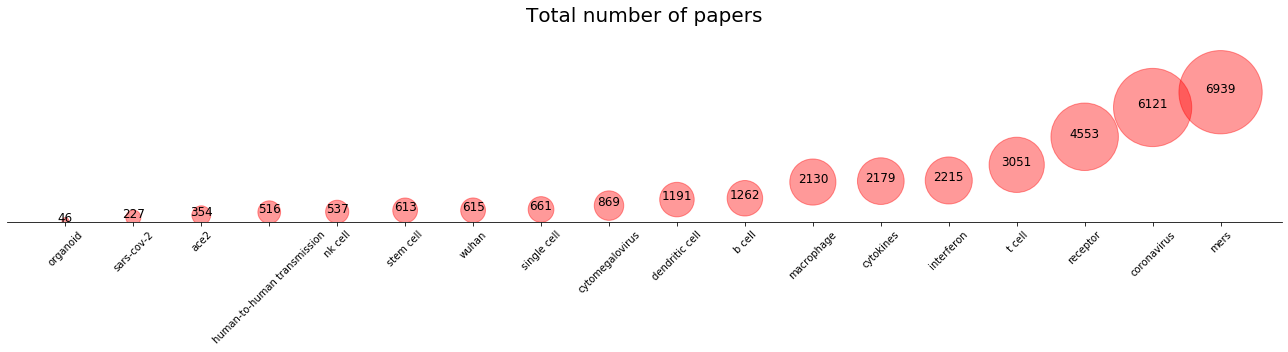

In [65]:
# STEP 3:   
# Generate plots of numbers of papers mentioning each keyword
mentions_df = pd.DataFrame(data = list(zip(search_terms, num_papers)), 
                           columns = ["term", "number_of_papers"])
mentions_df.to_csv(savedir + "/mentions_df.csv", sep = ",", index = False)

plot_df = mentions_df.sort_values(by = "number_of_papers")
fig, ax = plt.subplots(figsize = (len(search_terms),5))
plt.scatter(x = plot_df["term"], y = plot_df["number_of_papers"], 
            s=plot_df["number_of_papers"], c="red", alpha=0.4)
for a,b in zip(plot_df["term"], plot_df["number_of_papers"]):
    plt.text(a,b, str(b), horizontalalignment="center", fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Total number of papers", fontsize = 20)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0,(max(plot_df['number_of_papers']+(max(plot_df['number_of_papers']/2)))))
plt.tight_layout()
plt.savefig(savedir + "/mentions_df.pdf")

In [47]:
# STEP 4:
# Generate connection dataframes
from itertools import combinations

samples = list(range(0,len(search_terms)))
comb = list(combinations(samples, 2))

comb_terms = list(combinations(search_terms,2))
start = []
end = []
for e in comb_terms:
    start.append(e[0])
    end.append(e[1])

term_connections = []

for v, term in zip(comb, comb_terms):
    df1 = df_list[v[0]]
    #print(df1.shape)

    df2 = df_list[v[1]]
    #print(df2.shape)

    merged_df = pd.merge(df1, df2, on='paper_id')
    merged_df = merged_df.drop(['title_y','abstract_y', 'body_text_y'], axis = 1)
    merged_df.to_csv(savedir + "/{}_{}_papers.csv".format(term[0], term[1]), sep = ",", index = False)
    #print("##---##")
    #print("number of {} and {} connections : {}".format(term[0], term[1],merged_df.shape[0]))
    term_connections.append(merged_df.shape[0])

connections_df = pd.DataFrame(data = list(zip(start, end, term_connections)),
                              columns = ['start', 'end', 'connection'])

connections_df.to_csv(savedir + "/connections_df.csv", sep = ",", index = False)
connections_df

,start,end,connection
0,nk cell,macrophage,384
1,nk cell,dendritic cell,319
2,nk cell,b cell,288
3,nk cell,cytokines,407
4,nk cell,coronavirus,248
...,...,...,...
148,human-to-human transmission,single cell,9
149,human-to-human transmission,stem cell,9
150,t cell,single cell,407
151,t cell,stem cell,380


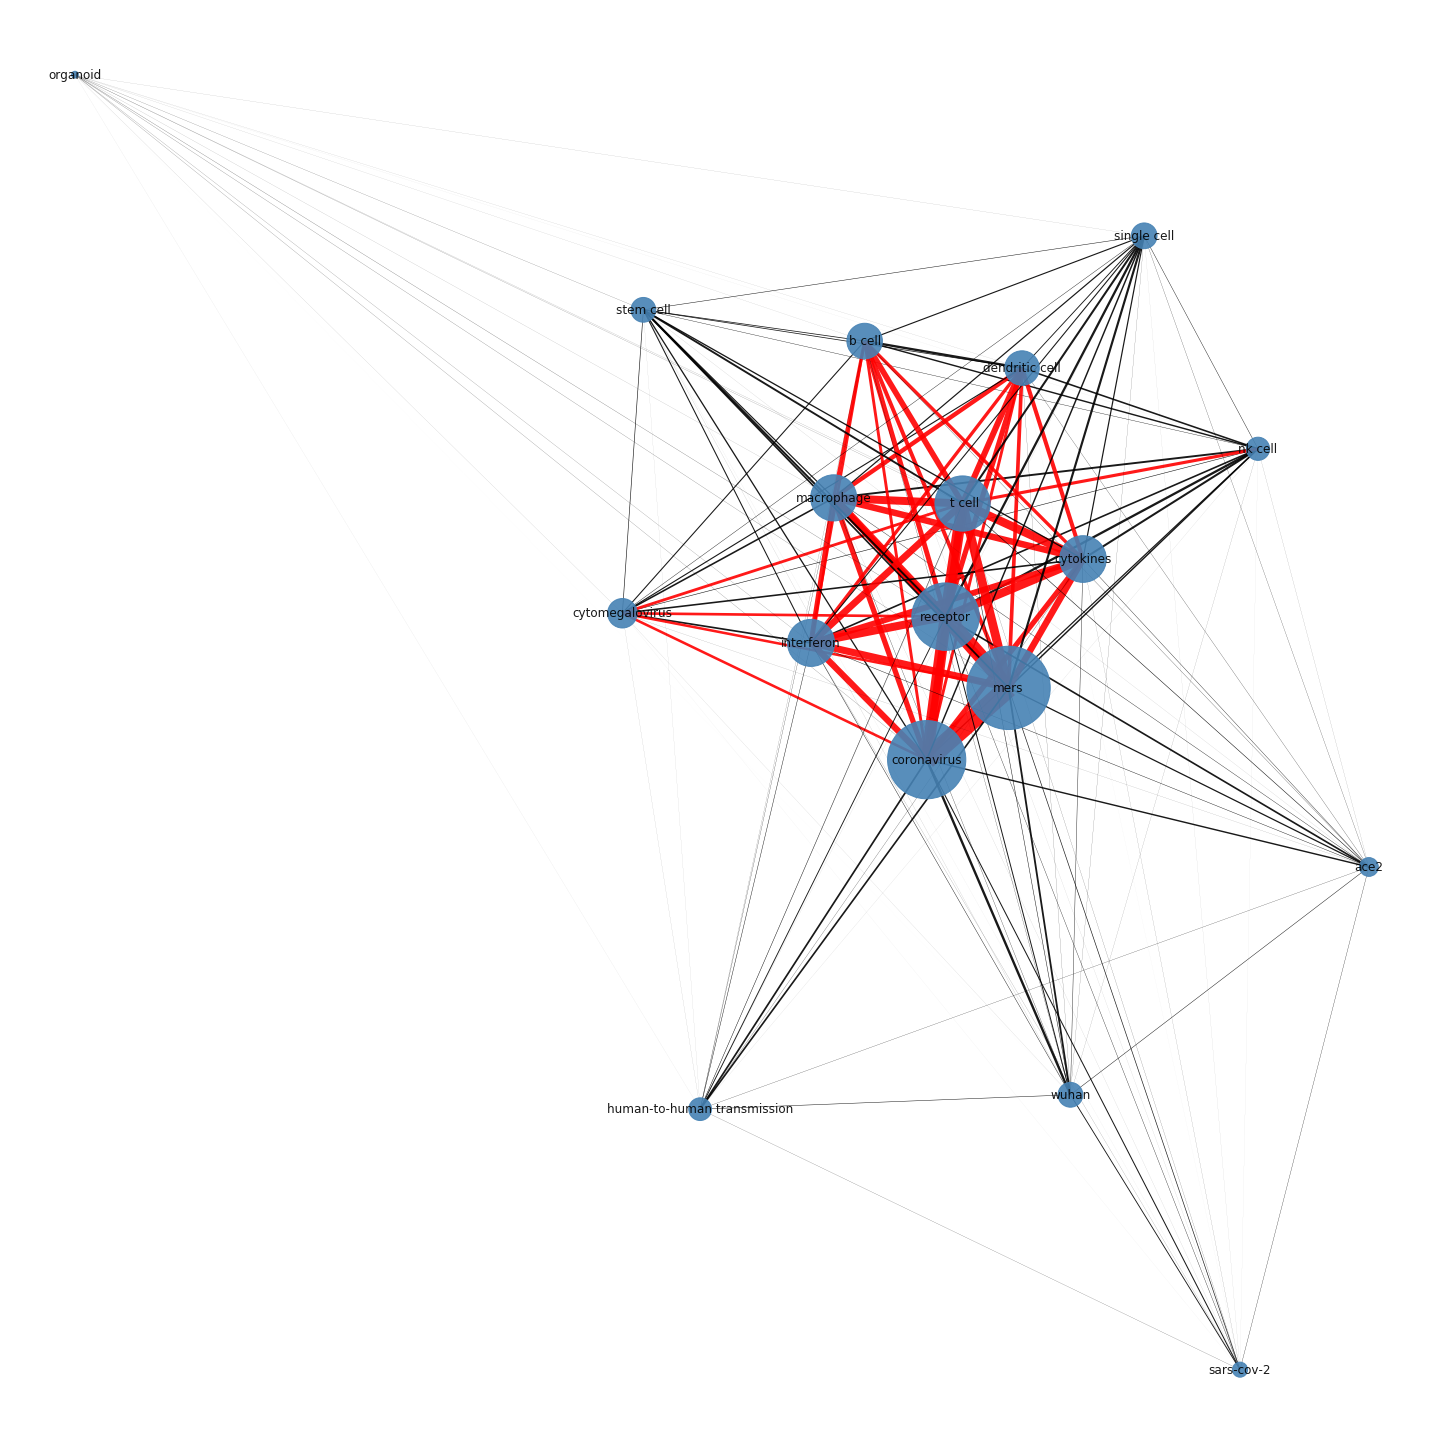

In [80]:
# STEP 5:
# Draw the plot
import networkx as nx
G = nx.from_pandas_edgelist(connections_df, 'start', 'end', 'connection', create_using=nx.Graph())
#print(nx.info(G))
#print(list(G.edges(data = True)))

# Set node properties
node_names = list(G.nodes())
node_data = mentions_df[mentions_df['term'].isin(node_names)]
node_size = [i for i in node_data['number_of_papers']]
node_color = [G.degree(v) for v in G]

# Set edge properties
edge_width = [0.005 * G[u][v]['connection'] for u, v in G.edges()]
edge_colors = []
for u, v in G.edges():
    if G[u][v]['connection'] > 500:
        edge_colors.append('red')
    else:
        edge_colors.append("black")
        
# Generate plot
k = 0.5
pos = nx.spring_layout(G, weight='connection', k = k, iterations = 100)

figure, ax = plt.subplots(figsize=(20, 20), constrained_layout=True)
nx.draw(G, pos, with_labels = True, node_size= node_size,width = edge_width,
                node_color = 'SteelBlue', edge_color = edge_colors, font_size=12, 
                alpha=0.9, arrows = True)
plt.axis('off')
plt.savefig(savedir + "/all_terms_network.pdf")

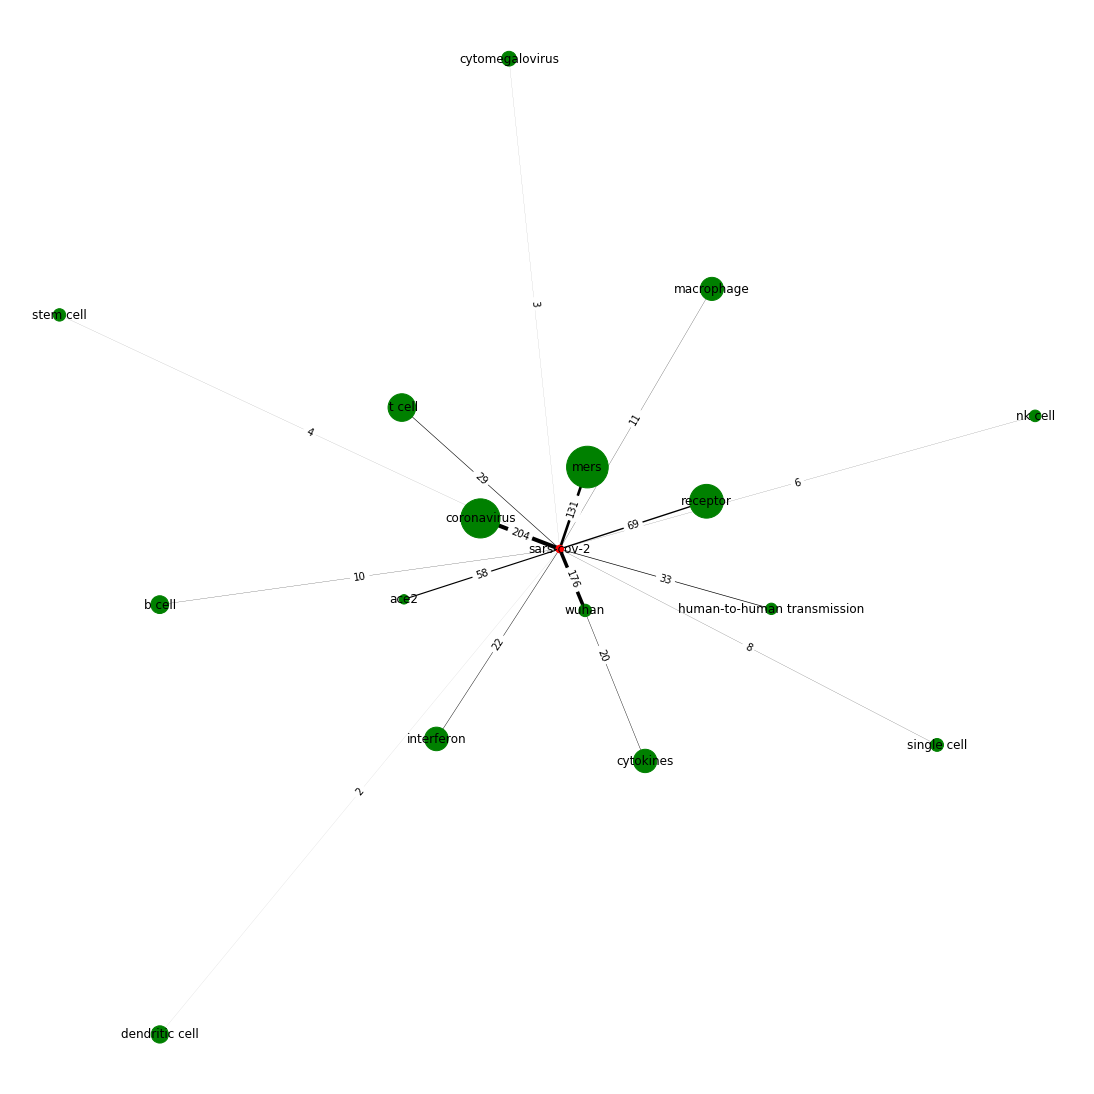

In [85]:
#%%
# Generate a plot for selected node
central_node = "sars-cov-2"

node_of_interest = central_node
selected_nodes=[(n,v,e) for n,v,e in list(G.edges(data=True)) if (n == node_of_interest or v == node_of_interest)
                and G[n][v]['connection'] != 0]
#print (selected_nodes)

H = nx.Graph(selected_nodes)

# set node color
color_map = []
for node in H:
    if node == node_of_interest:
        color_map.append('red')
    else: 
        color_map.append('green')

# set edge width
edge_width = [0.02 * H[u][v]['connection'] for u, v in H.edges()]

# set edge width
edge_labels = nx.get_edge_attributes(H, 'connection')

# set node size
sel_node_names = list(H.nodes())
sel_node_data = mentions_df[mentions_df['term'].isin(sel_node_names)]
sel_node_data.set_index('term', inplace = True)
sel_node_data = sel_node_data.loc[sel_node_names,] # correct the order of node names
node_size = [(i/4) for i in sel_node_data['number_of_papers']]

# generate output graph
k = 0.5
pos = nx.spring_layout(H, weight='connection', k = k, iterations = 50, scale= 1.2)

plt.figure(figsize=(15, 15))
nx.draw(H,pos, with_labels=True, width = edge_width, node_size = node_size,
        legend_position='right',font_size=12, node_color=color_map)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=10,)
plt.savefig(savedir + "/select_term_network.pdf")